In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('cardekho_car_price_prediction.csv')

In [3]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
data.shape

(301, 9)

In [5]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
print(data['Fuel_Type'].unique())
print(data['Seller_Type'].unique())
print(data['Transmission'].unique())
print(data['Owner'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [8]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [9]:
data = data[[ 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [10]:
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [11]:
data['Current_Year']=2021
data['Car_Age']=data['Current_Year']-data['Year']

In [12]:
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,Car_Age
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [13]:
data.drop(['Year','Current_Year'],axis=1,inplace=True)

In [14]:
data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [15]:
data= pd.get_dummies(data,drop_first=True)

In [16]:
data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


# Finding Correlation

In [17]:
data.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Car_Age,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

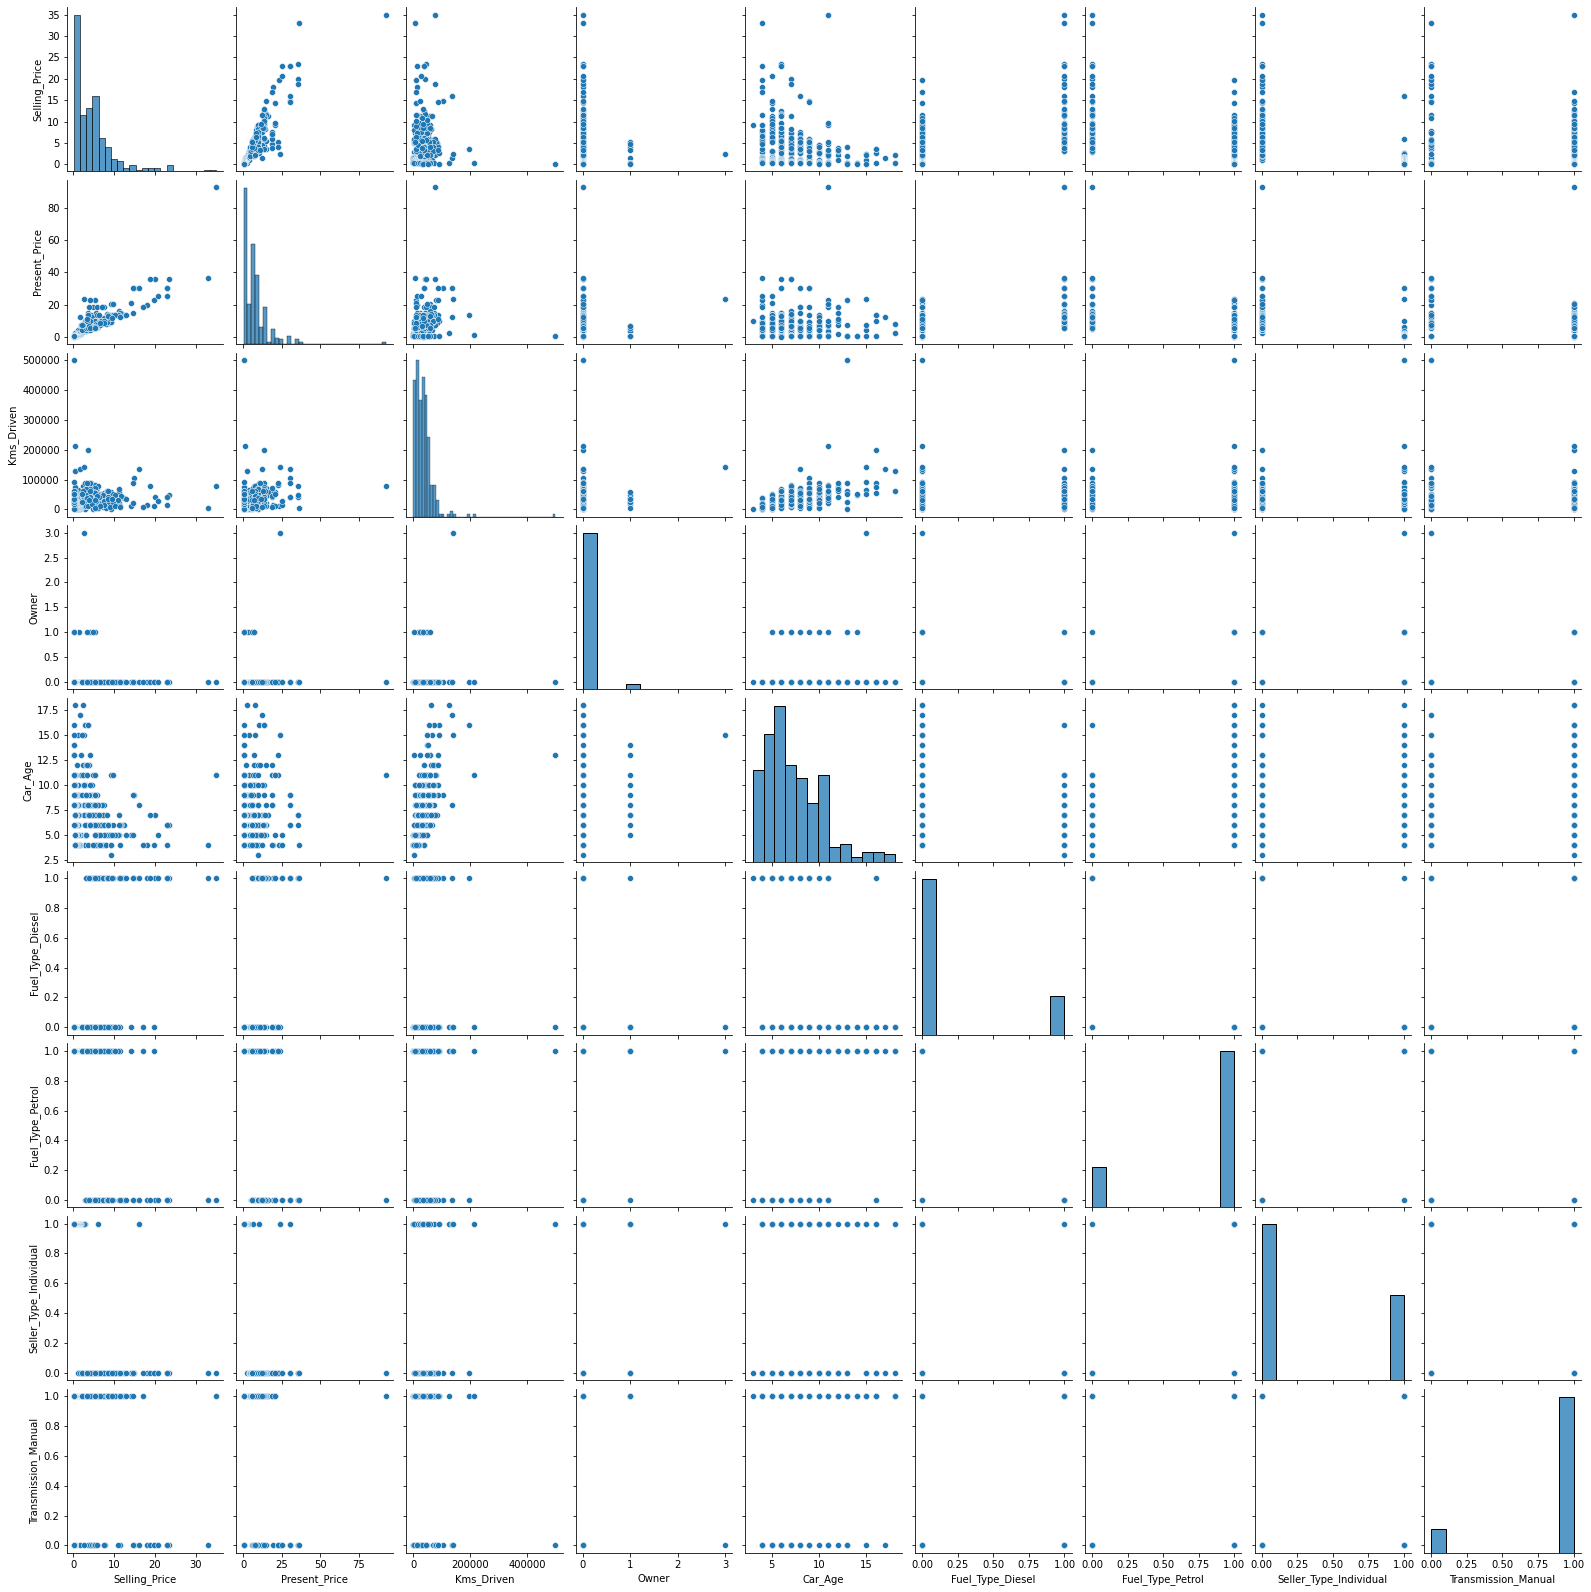

In [19]:
sns.pairplot(data)

<AxesSubplot:>

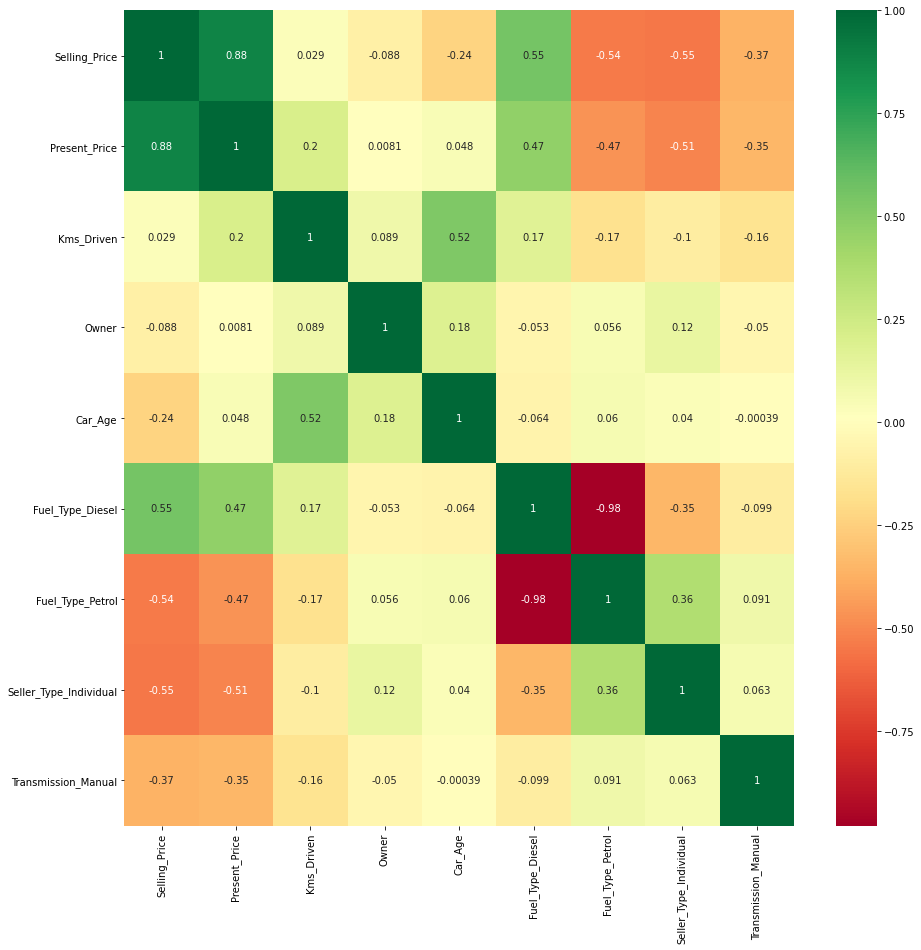

In [20]:
corrmat=data.corr() 
top_corr_features=corrmat.index 
plt.figure(figsize=(15,15)) 
sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [21]:
correlation = data.corr()
correlation['Selling_Price'].sort_values(ascending= False)

Selling_Price             1.000000
Present_Price             0.878983
Fuel_Type_Diesel          0.552339
Kms_Driven                0.029187
Owner                    -0.088344
Car_Age                  -0.236141
Transmission_Manual      -0.367128
Fuel_Type_Petrol         -0.540571
Seller_Type_Individual   -0.550724
Name: Selling_Price, dtype: float64

<AxesSubplot:xlabel='Selling_Price', ylabel='Present_Price'>

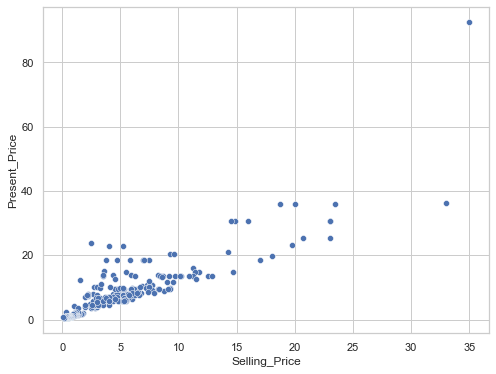

In [22]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(8,6))
#sns.barplot(data=data,x='Selling_Price',y='Present_Price')
sns.scatterplot(data=data,x='Selling_Price',y='Present_Price',alpha=1,ax=ax)

# Separate label & Features

In [23]:
x_data= data.iloc[:,1:]
y_data = data.iloc[:,0]

In [24]:
x_data.head()

,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1


In [25]:
y_data.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

# Finding Important Feature

In [26]:
from sklearn.ensemble import ExtraTreesRegressor
impo = ExtraTreesRegressor()
impo.fit(x_data,y_data)

ExtraTreesRegressor()

In [27]:
print(impo.feature_importances_)

[4.04842411e-01 4.09904416e-02 3.85293823e-04 8.00184578e-02
 2.03465763e-01 1.24787005e-02 1.30534941e-01 1.27283991e-01]


<AxesSubplot:>

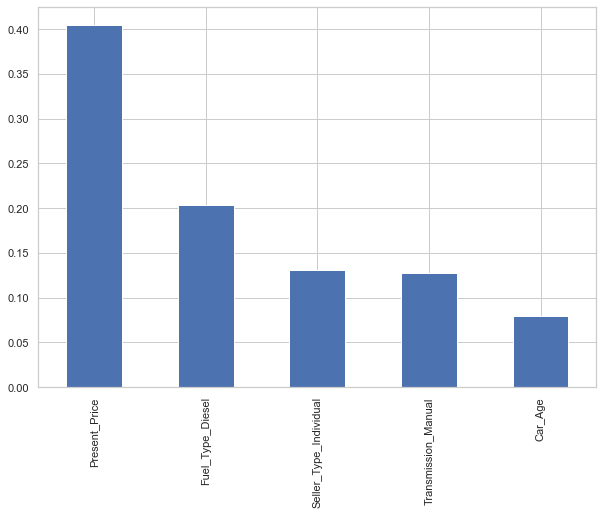

In [28]:
impo_feature = pd.Series(impo.feature_importances_,index=x_data.columns)
impo_feature.nlargest(5).plot(kind='bar',figsize=(10,7))

# Train-Test Split

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.2,random_state=42)


In [30]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(240, 8)
(61, 8)
(240,)
(61,)


# model selection

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = DecisionTreeRegressor()
#model = LinearRegression()
model = RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

# model evaluation

In [32]:
from sklearn.metrics import mean_squared_error,accuracy_score
prediction = model.predict(x_train)
mse = mean_squared_error(y_train,prediction)
rmse = np.sqrt(mse)

<IPython.core.display.Javascript object>

In [33]:
print(rmse)


0.6319527095967439


# For better evaluation use cross validation

In [34]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(model,x_train,y_train,scoring="neg_mean_squared_error",cv=10)
rmse_score = np.sqrt(-score)

<IPython.core.display.Javascript object>

In [35]:
rmse_score

array([1.25110261, 0.66412003, 3.53390272, 0.81679215, 2.01511161,
       0.61813283, 2.58913132, 1.03488405, 1.33743335, 0.72688895])

In [36]:
np.mean(rmse_score)

<IPython.core.display.Javascript object>

1.4587499613119497

#  Final Testing on Test-Data

In [37]:
final_predicrion = model.predict(x_test)
final_mse = mean_squared_error(y_test,final_predicrion)
final_rmse = np.sqrt(final_mse)

<IPython.core.display.Javascript object>

In [38]:
final_rmse

0.9621979796108561

c:\python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

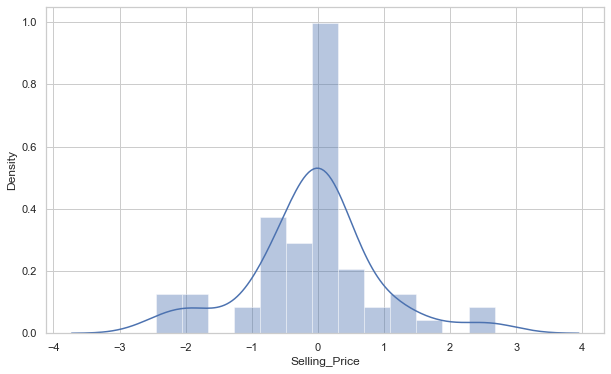

In [39]:
fig, ax = plt.subplots(figsize=(10,6))
sns.distplot(y_test-final_predicrion,ax=ax)

<AxesSubplot:xlabel='Selling_Price'>

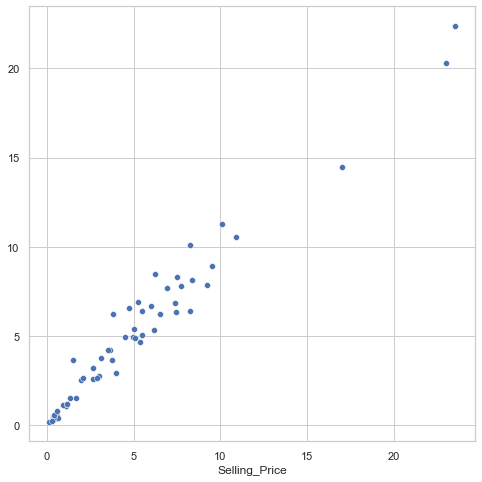

In [40]:
fig, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(x=y_test,y=final_predicrion ,ax=ax)

In [41]:
import pickle
file = open('random_forest_regression_model.pkl','wb')
pickle.dump(model,file)